## Nearest Neighbor Classification

<div class="alert alert-info">
  <strong>Nearest neighbor</strong>
</div>

## Learning from training data
A key concept in machine learning is using a subset of a dataset to train an algorithm to make estimates on a separate set of test data. The quality of the machine learning and algorithm can be assesed based on the accuracy of the predictions made on test data. Many times there are also parameters sometimes termed hyper-parameters which can be optimized through an iterative approach on test or validation data. In practice a dataset is randomly split into training and test sets using sampling. 

### k nearest neighbor
We will examine one machine learning algorithm in the laboratory, k nearest neighbor. Many of the concepts are applicable to the broad range of machine learning algorithms available.

### Nearest neighbor concept<a id='NNconcept'></a>
The training examines the characteristics of *k* nearest neighbors to the data point for which a prediction will be made. Nearness is measured using several different [metrics](https://www.nhm.uio.no/english/research/infrastructure/past/help/similarity.html) with Euclidean distance being a common one for numerical attributes.  
Euclidean distance:   
1-D: 
\begin{align} 
d(p,q) = \sqrt{(p-q)^{2}} 
\end{align}
 2-D: 
\begin{align} 
 d(p,q) = \sqrt{(p_1-q_1)^{2}+(p_2-q_2)^{2}} 
\end{align}
 
 For multiple points (rows, multidimensional):
\begin{align} 
 d(p_i,q_i) = \sqrt{\sum_{i}{((p_i-q_i)^{2})}} 
\end{align}

In [1]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### Distance function inspired from above equations (1-3).

In [2]:
def distance(pt1, pt2):
    """The distance between two points, represented as arrays."""
    return np.sqrt(np.sum((pt2-pt1)**2))

### Nearest neighbor Functions
These cells create the complete algorithm and use as part of a nearest neighbor toolbox

In [3]:
def row_distance(row1, row2):
    """The distance between two rows of a table."""
    return distance(np.array(row1), np.array(row2)) # Need to convert rows into arrays

def distances(training, test, target, features):
    """Compute the distance from test for each row in training."""
    dists = []
    attributes = training.select(features)
    for row in attributes.rows:
        dists.append(row_distance(row, test))
    return training.with_column('Distance', dists)

def closest(training, test, k, target, features):
    """Return a table of the k closest neighbors to example row from test data."""
    return distances(training, test, target, features).sort('Distance').take(np.arange(k))

### Prediction Functions

In [4]:
def predict_knn(row, train, test, k=5, pr=False):
    """Return the predicting value or class among the 
     k nearest neighbors, pr=1 prints"""
    if pr:
            print(f'Predicting target value, {target[0]}, for row = {row} using k={k} with features: {features}')
    return np.average(closest(train, test.select(features).row(row), k , target, features).column(target[0]))

In [5]:
def predict_knn_class(row, train, test, k=5, pr=False):
    """Return the predicting value or class among the 
     k nearest neighbors, pr=1 prints"""
    closestclass = list(closest(train, test.select(features).row(row), k , target, features).column(target[0]))
    if pr:
            print(f'Predicting target value, {target[0]}, for row = {row} using k={k} with features: {features}')
            print(f'Actual classification: {test.select(target).take(row)[0][0]}')
            print(f'Predicted classification: {max(closestclass, key=closestclass.count)}')
            print(f'Closest classifications: {closestclass}')
    return max(closestclass, key=closestclass.count)

### Regression Functions
Use as part of a toolbox for later analysis and the project

In [6]:
def standard_units(any_array):
    "Convert any array of numbers to standard units."
    return (any_array - np.mean(any_array))/np.std(any_array)  
    
def correlation(t, label_x, label_y):
    """Compute the correlation between two variables from a Table with column label_x and label_y.."""
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    """Compute the slope between two variables from a Table with column label_x and label_y."""
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    """Compute the slope between two variables from a Table with column label_x and label_y."""
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

---
---
### <font color='brown'>Classification example
---

In [7]:
CKD=Table().read_table('data/ckd.csv')
CKD

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,163,7.7,136,3.8,9.8,32,6900,3.4,yes,no,no,good,no,yes,1
69,70,1.01,3,4,normal,abnormal,notpresent,notpresent,264,87,2.7,130,4,12.5,37,9600,4.1,yes,yes,yes,good,yes,no,1
73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,32,0.9,125,4,10,29,18900,3.5,yes,yes,no,good,yes,no,1
73,80,1.02,2,0,abnormal,abnormal,notpresent,notpresent,253,142,4.6,138,5.8,10.5,33,7200,4.3,yes,yes,yes,good,no,no,1
46,60,1.01,1,0,normal,normal,notpresent,notpresent,163,92,3.3,141,4,9.8,28,14600,3.2,yes,yes,no,good,no,no,1


#### Define target and features

In [8]:
target = ['Class']
features = ['Blood Pressure','Blood Glucose Random','Hemoglobin','Serum Creatinine' ]

In [9]:
sCKD = CKD.select(target[0])

#### Standardize

In [52]:
for label in features:
    print('Standardizing: ',label)
    sCKD = sCKD.with_columns(label,standard_units(CKD[label]))
sCKD   

Standardizing:  Age
Standardizing:  Blood Pressure
Standardizing:  Blood Glucose Random
Standardizing:  Hemoglobin
Standardizing:  Serum Creatinine


Class,Age,Blood Pressure,Blood Glucose Random,Hemoglobin,Serum Creatinine
1,-0.101098,-0.363613,-0.221549,-0.865744,0.52525
1,0.222253,1.43173,-0.947597,-1.45745,1.63351
1,0.868954,-0.363613,3.84123,-1.00497,0.166693
1,1.19231,0.534056,0.396364,-2.81488,0.623038
1,0.739614,0.534056,0.643529,-2.08395,0.557846
1,-0.101098,0.534056,-0.561402,-1.35303,1.79649
1,1.25698,-0.363613,2.04928,-0.413266,0.166693
1,1.51566,-0.363613,-0.947597,-1.28342,-0.420035
1,1.51566,0.534056,1.87936,-1.10939,0.786018
1,-0.230439,-1.26128,0.489051,-1.35303,0.36227


### Train, test split

In [53]:
trainK, testK = sCKD.split(int(0.8*CKD.num_rows))
print(trainK.num_rows, 'training and', testK.num_rows, 'test instances.')

trainK.show(3)

126 training and 32 test instances.


Class,Age,Blood Pressure,Blood Glucose Random,Hemoglobin,Serum Creatinine
0,-0.424449,-1.26128,-0.36058,1.43145,-0.387439
0,-0.87714,0.534056,-0.71588,0.66572,-0.354843
0,-0.424449,0.534056,-0.0207275,0.770138,-0.354843


In [54]:
predict_knn_class(16, trainK, testK, k=8, pr=True)

Predicting target value, Class, for row = 16 using k=8 with features: ['Age', 'Blood Pressure', 'Blood Glucose Random', 'Hemoglobin', 'Serum Creatinine']
Actual classification: 1
Predicted classification: 1
Closest classifications: [1, 1, 1, 1, 1, 1, 1, 1]


1

#### Test prediction accuracy using specified features

In [112]:
correct = 0
predict_list = []
for i in np.arange(testK.num_rows):
    predict = predict_knn_class(i, trainK, testK, k=8, pr=False)
    predict_list.append(predict)
    correct += 1*(predict == testK[target[0]][i])
print(f'Percent correct: {correct/testK.num_rows*100:.1f}%')

Percent correct: 100.0%


#### Convert test data to original units and plot using below functions
Examine relationship between two variables and prediction (0 = no CKD, 1 = CKD)

In [93]:
def original_val(x_z,xmean,xstd):
    """Convert standard z-value back to original"""
    x = x_z*xstd + xmean
    return x

In [94]:
def plot_relate(tbl, test, predict_list, labelx, labely):
    """Plot prediction in original units"""
    testvals = Table().with_columns(target[0],testK[target[0]], 'predict',predict_list)
    for label in features:
        xmean = np.mean(tbl[label])
        xstd = np.std(tbl[label])
        x = original_val(test[label],xmean,xstd)
        testvals=testvals.with_columns(label,x)
    scatter = plt.scatter(testvals[labelx],testvals[labely], c=testvals['predict'])
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.legend(*scatter.legend_elements())
    return testvals
    

Class,predict,Age,Blood Pressure,Blood Glucose Random,Hemoglobin,Serum Creatinine
1,0,48,70,117,11.2,3.8
0,0,38,80,99,13.6,0.5
1,0,45,70,117,10,2.2
1,0,21,90,107,8.3,1.7
0,0,66,70,107,13.6,1.1
1,1,55,90,273,8.3,14.2
0,0,32,70,100,14.3,1.1
0,0,41,70,125,16.8,0.6
0,0,30,80,131,14.1,1
0,0,38,60,91,14,0.7


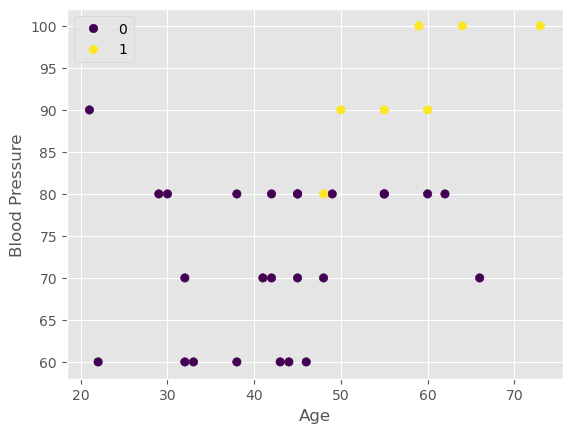

In [95]:
plot_relate(CKD, testK, predict_list, "Age", "Blood Pressure")

**<font color=blue>Interpretation: Older patients with high blood pressure are more likely to be predicted to have CKD**

Class,predict,Age,Blood Pressure,Blood Glucose Random,Hemoglobin,Serum Creatinine
1,0,48,70,117,11.2,3.8
0,0,38,80,99,13.6,0.5
1,0,45,70,117,10,2.2
1,0,21,90,107,8.3,1.7
0,0,66,70,107,13.6,1.1
1,1,55,90,273,8.3,14.2
0,0,32,70,100,14.3,1.1
0,0,41,70,125,16.8,0.6
0,0,30,80,131,14.1,1
0,0,38,60,91,14,0.7


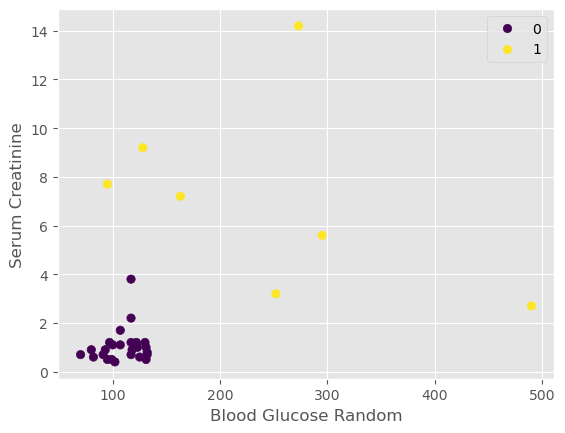

In [96]:
plot_relate(CKD, testK, predict_list, "Blood Glucose Random", "Serum Creatinine")

**<font color=blue>Interpretation: Patients with low creatinine and blood glucose are less likely to be predicted to have CKD**

**<font color=green>Pretty good prediction, let's see if we can do better with additional features**

#### Add additional features

In [97]:
features

['Age',
 'Blood Pressure',
 'Blood Glucose Random',
 'Hemoglobin',
 'Serum Creatinine']

In [106]:
target = ['Class']
features = ['Age','Blood Pressure','Blood Glucose Random','Hemoglobin','Serum Creatinine', 'Sodium', 'Blood Urea' ]

In [107]:
sCKD = CKD.select(target[0])

In [108]:
for label in features:
    print('Standardizing: ',label)
    sCKD = sCKD.with_columns(label,standard_units(CKD[label]))
sCKD   

Standardizing:  Age
Standardizing:  Blood Pressure
Standardizing:  Blood Glucose Random
Standardizing:  Hemoglobin
Standardizing:  Serum Creatinine
Standardizing:  Sodium
Standardizing:  Blood Urea


Class,Age,Blood Pressure,Blood Glucose Random,Hemoglobin,Serum Creatinine,Sodium,Blood Urea
1,-0.101098,-0.363613,-0.221549,-0.865744,0.52525,-3.73015,0.0724741
1,0.222253,1.43173,-0.947597,-1.45745,1.63351,-3.32831,1.15195
1,0.868954,-0.363613,3.84123,-1.00497,0.166693,-1.05122,0.157139
1,1.19231,0.534056,0.396364,-2.81488,0.623038,-1.18517,0.792125
1,0.739614,0.534056,0.643529,-2.08395,0.557846,-0.515439,2.01976
1,-0.101098,0.534056,-0.561402,-1.35303,1.79649,-0.381492,2.33726
1,1.25698,-0.363613,2.04928,-0.413266,0.166693,-1.18517,0.728626
1,1.51566,-0.363613,-0.947597,-1.28342,-0.420035,-1.8549,-0.435514
1,1.51566,0.534056,1.87936,-1.10939,0.786018,-0.1136,1.89277
1,-0.230439,-1.26128,0.489051,-1.35303,0.36227,0.288239,0.834457


In [109]:
trainK, testK = sCKD.split(int(0.8*CKD.num_rows))
print(trainK.num_rows, 'training and', testK.num_rows, 'test instances.')

trainK.show(3)

126 training and 32 test instances.


Class,Age,Blood Pressure,Blood Glucose Random,Hemoglobin,Serum Creatinine,Sodium,Blood Urea
0,-0.295109,0.534056,-0.762223,0.770138,-0.517823,1.09192,-0.0756892
1,0.610274,2.3294,1.91025,-2.22318,3.45889,-0.515439,1.6811
0,0.028242,0.534056,0.0874074,0.14363,-0.452631,0.0203463,-0.139188


#### Test prediction accuracy using specified features

In [111]:
correct = 0
for i in np.arange(testK.num_rows):
    predict = predict_knn_class(i, trainK, testK, k=8, pr=False)
    correct += 1*(predict == testK[target[0]][i])
print(f'Percent correct: {correct/testK.num_rows*100:.1f}%')

Percent correct: 100.0%


Class,predict,Age,Blood Pressure,Blood Glucose Random,Hemoglobin,Serum Creatinine,Sodium,Blood Urea
0,0,34,70,87,17.1,0.5,144,38
0,0,63,70,113,16.5,0.6,146,25
0,0,47,60,137,13.6,0.5,150,17
1,1,63,70,380,10.8,2.7,131,60
0,0,49,80,122,17,1.2,139,32
0,0,58,70,88,16.4,1.1,147,16
0,0,33,80,100,16.9,1.2,142,37
0,0,47,80,124,14.9,1,140,44
0,0,29,80,70,13.7,0.7,138,16
0,0,44,70,92,14,0.9,141,40


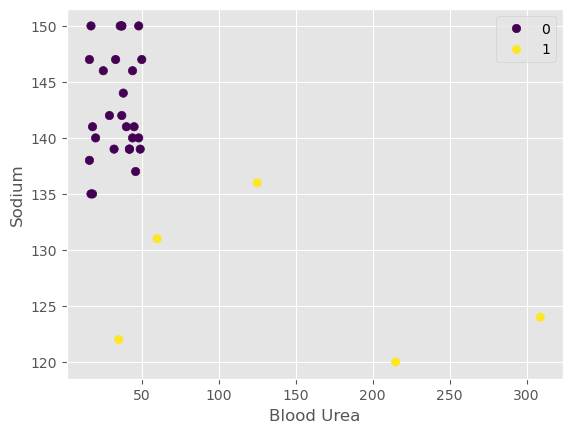

In [114]:
plot_relate(CKD, testK, predict_list, "Blood Urea", "Sodium")

**<font color=blue>Interpretation: Patients with high sodium and low urea are likely to be predicted to have CKD**

**<font color=green>Improved...**